# Comparação de reatores - CSTR e batelada

Um exemplo para a comparação de desempenho de um reator CSTR e um reator batelada para uma reação de segunda ordem do tipo $(-r_A) = k\cdot C_A^2$.

Vamos usar os seguintes pacotes:

* **Numpy**, para lidar com vetores e expressões algébricas;
* **Matplotlib**, para plotar os resultados;
* **Odeint**, para integração de equações diferenciais.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Agora, precisamos das equações diferenciais a serem resolvidas. Partindo do balanço de massa geral para o volume de controle (reator), temos:

$$\textrm{ENTRA - SAI + GERADO - CONSUMIDO} = \textrm{ACUMULADO}$$

A diferença entre o que entra e o que sai é dada por (F$_{A0} -$ F$_A$). Já o termo de geração é dado por $\int_0^{V}(-r_A)dV$. Consideramos não haver consumo de matéria dentro do volume de controle e o que acumula é o número de mols da espécie analisada (A) com o tempo ($\frac{d N_A}{d t}$). Assim, temos:

$$F_{A0} - F_A + \int_0^V (-r_A) dV = \frac{d N_A}{dt}$$

Consideração:

* A taxa de reação independe do volume do reator, sendo possível tirá-la de dentro da integral.

Assim, dividindo ambos os lados da expressão pelo volume (V) do reator, chegamos à:

$$\frac{F_{A0} - F_A}{V} + \frac{(-r_A)\cdot V}{V} = \frac{dN_A}{dt}\cdot\frac{1}{V}$$

Lembrando que $\frac{F_A}{V} = \frac{C_A}{\tau}$, onde $\tau$ = $\frac{V}{v_0}$ = tempo de residência do reator (min$^{-1}$), ficamos com:

$$\frac{dC_A}{dt} = \frac{v_0}{V}\cdot(C_{A0} - C_A) + (-r_A)$$

Já para o reator batelada, não temos termos de entrada nem saída. Portanto, considerando que a taxa de reação independe do volume, ficamos com:

$$\frac{dC_A}{dt} = (-r_A)$$

## Primeiro passo: definindo os parâmetros necessários

Vamos precisar definir quatro parâmetros:

* A concentração inicial da espécie A (C$_{A0}$, mol.L$^{-1}$);
* A fração volumétrica ($v_0$) no reator CSTR (L.min$^{-1}$);
* A constante de velocidade da reação ($k$), que vamos assumir como **independente** da temperatura (L.mol$^{-1}$.min$^{-1}$);
* O volume (V) do reator (L); 

In [7]:
v0 = 10.0 #L/min, vazão volumétrica de entrada (CSTR)
V = 100.0 #L, volume do reator (CSTR)
k = 0.17 #L/mol.min, constante de velocidade da reação (aprox: independente da temperatura)
Ca0 = 5.0 #mol/L, concentração de A na entrada do reator (CSTR)

## Segundo passo: definindo as funções para integração, o espaço de integração e o chute inicial

Vamos, agora, definir as funções `CSTR` e `BAT` para serem integradas: 

In [8]:
def CSTR(Ca,t):
    dCadt = (v0 / V) * (Ca0 - Ca) - (k * Ca**2)
    return dCadt

def BAT(Cb,t):
    dCbdt = -k*Cb**2
    return dCbdt

Agora, vamos definir o espaço de integração (um espaço linear para o tempo, com alguns pontos) e um chute inicial para a concentração (o integrador `odeint` precisa partir de um chute inicial para integrar numericamente qualquer equação diferencial):

In [9]:
t = np.arange(0.0,20.0,0.1)
C0 = 5.0

## Terceiro passo: integrando e calculando a conversão

Para integrar, basta chamar o integrador `odeint`, inserindo três argumentos: a função a ser integrada, o chute inicial, e o espaço de integração.

In [10]:
Y = odeint(CSTR, C0, t)
Z = odeint(BAT, C0, t)

Vamos agora calcular a conversão das reações? Lembre-se que a conversão é dada por: 

$$X = \frac{\textrm{ENTRA - SAI}}{\textrm{ENTRA}}$$

In [12]:
XA = (Ca0 - np.array(Y))/Ca0 #colocamos aqui os resultados de Y e Z num array, para que seja possível fazer a conta.
XB = (Ca0 - np.array(Z))/Ca0

## Quarto passo: plotando os resultados

Agora, vamos finalmente usar o matplotlib para plotar os resultados.

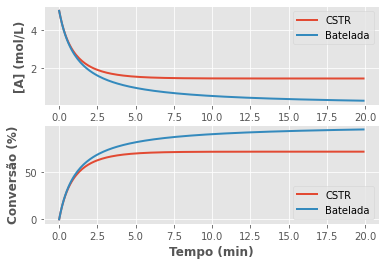

In [13]:
plt.style.use('ggplot')
plt.subplot(211)
plt.plot(t,Y, linewidth = 2.0, label = 'CSTR')
plt.plot(t,Z, linewidth = 2.0, label = 'Batelada')
plt.ylabel(u'[A] (mol/L)', fontweight='bold')
plt.legend(loc = 'best')

plt.subplot(212)
plt.plot(t,XA*100.0, linewidth = 2.0, label = 'CSTR')
plt.plot(t,XB*100.0, linewidth = 2.0, label = 'Batelada')
plt.xlabel('Tempo (min)', fontweight='bold')
plt.ylabel(u'Conversão (%)', fontweight='bold')
plt.legend(loc = 'best')
plt.show()